In [22]:
# Info:

# Author:
# Date

# Purpose:

# inputs:

# outputs:

# Version control:

#------------------------------------------------------------------------------

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import copy

In [24]:
# Importing the training set
#dataset_train = pd.read_csv('Elec_ON_Price_Train.csv')
dataset_train = pd.read_csv('Elec_Demand_train.csv')

In [25]:
training_set = dataset_train.iloc[:1000, 1:2].values

In [26]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [27]:
# Creating a data structure with 60 timesteps and 1 output
x_train = []
y_train = []
for i in range(60, len(training_set)):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

'''
x_train = x_train[0:1000, :]
y_train = y_train[0:1000]
'''

'\nx_train = x_train[0:1000, :]\ny_train = y_train[0:1000]\n'

In [28]:
# Reshaping,
# NOTE: Keras expect data in the form of [batch_size, Time_steps, sequence_length]
#             sometimes refer to as [batch_size, timesteps, units]
#             or in other word  [No_samples, No_datapoints_in_time, No_featuers]

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [29]:
# -----------------------------------------------------------------------------
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU

In [42]:
# Initialising the RNN
my_regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
my_regressor.add(LSTM(units = 30, return_sequences = True,
                      input_shape = (x_train.shape[1], 1)))
my_regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
#my_regressor.add(LSTM(units = 50, return_sequences = True))
#my_regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
#my_regressor.add(LSTM(units = 50, return_sequences = True))
#my_regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
my_regressor.add(LSTM(units = 30))
my_regressor.add(Dropout(0.2))

# Adding the output layer
my_regressor.add(Dense(units = 1))

# Compiling the RNN
my_regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',
                     metrics = ['mean_squared_error'])

In [ ]:
# Fitting the RNN to the Training set
history = my_regressor.fit(x_train,
                           y_train,
                           validation_split=0.2,
                           epochs = 100,
                           batch_size = 32)


Epoch 1/100


2022-01-18 20:25:59.643264: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-18 20:25:59.870833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-18 20:25:59.961894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-18 20:26:00.068630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 1/24 [>.............................] - ETA: 32s - loss: 0.2321 - mean_squared_error: 0.2321

2022-01-18 20:26:00.243441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.1001 - mean_squared_error: 0.1001

2022-01-18 20:26:01.772277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-18 20:26:01.846060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-18 20:26:01.926253: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 3s 79ms/step - loss: 0.1001 - mean_squared_error: 0.1001 - val_loss: 0.0481 - val_mean_squared_error: 0.0481
Epoch 2/100
24/24 [==============================] - 1s 41ms/step - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 3/100
24/24 [==============================] - 1s 40ms/step - loss: 0.0757 - mean_squared_error: 0.0757 - val_loss: 0.0593 - val_mean_squared_error: 0.0593
Epoch 4/100
24/24 [==============================] - 1s 39ms/step - loss: 0.0734 - mean_squared_error: 0.0734 - val_loss: 0.0686 - val_mean_squared_error: 0.0686
Epoch 5/100
24/24 [==============================] - 1s 38ms/step - loss: 0.0631 - mean_squared_error: 0.0631 - val_loss: 0.0642 - val_mean_squared_error: 0.0642
Epoch 6/100
24/24 [==============================] - 1s 39ms/step - loss: 0.0572 - mean_squared_error: 0.0572 - val_loss: 0.0680 - val_mean_squared_error: 0.0680
Epoch 7/100
24/24 [=====================

In [32]:
# save the final model
#my_regressor.save('Price.h5')
my_regressor.save('demand.h5')

In [33]:
# to load keras model
# my_regressor = keras.models.load_model("Price.h5")
# my_regressor = keras.models.load_model("demand.h5")

In [34]:
# -----------------------------------------------------------------------------
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
#dataset_test = pd.read_csv('Elec_ON_Price_Test.csv')
dataset_test = pd.read_csv('Elec_Demand_test.csv')


real_price = dataset_test.iloc[:, 1:2].values

In [35]:
# Getting the predicted stock price of 2017
#dataset_total = pd.concat((dataset_train['HOEP'], dataset_test['HOEP']), axis = 0)
dataset_total = pd.concat((dataset_train['Demand'], dataset_test['Demand']), axis = 0)

In [36]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 60+len(dataset_test)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_price = my_regressor.predict(X_test)
predicted_price = sc.inverse_transform(predicted_price)

2022-01-18 20:25:13.805623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-18 20:25:13.876241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-18 20:25:13.959527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [37]:
from sklearn.metrics import mean_squared_error

mean_squared_error(dataset_test, predicted_price)

ValueError: Found array with dim 3. Estimator expected <= 2.

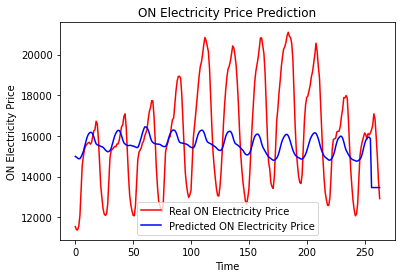

In [38]:
# Visualising the results
plt.plot(real_price, color = 'red', label = 'Real ON Electricity Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted ON Electricity Price')
plt.title('ON Electricity Price Prediction')
plt.xlabel('Time')
plt.ylabel('ON Electricity Price')
plt.legend()
plt.show()

In [39]:
# list all the data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


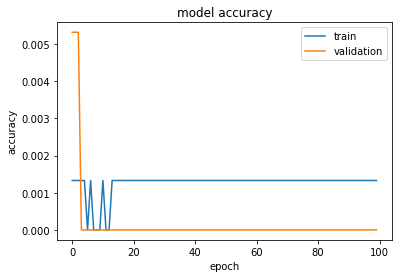

In [40]:
# Plot the accuracy for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

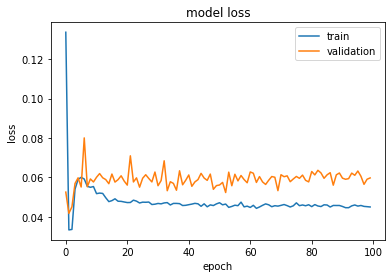

In [41]:
# Plot the loss for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()